Step 1: Data Preparation and Exploration

1.1 Load and Explore Data

In [1]:
# Installing and Importing Libraries
!pip install xgboost
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

# Load dataset
url = '/content/drive/My Drive/diabetes_dataset.csv'  # URL or file path
data = pd.read_csv(url)

# Overview of dataset
print(data.head())
print(data.info())
print(data.describe())

Mounted at /content/drive
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glu

1.2 Data Cleaning

In [2]:
# Replace 0 values in certain columns with NaN, then fill or drop as needed
cols_to_replace_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[cols_to_replace_zero] = data[cols_to_replace_zero].replace(0, pd.NA)

# Impute missing values with column median
data.fillna(data.median(), inplace=True)
print(data.isnull().sum())  # Confirm no missing values remain

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


<ipython-input-2-5c0c63b78465>:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.fillna(data.median(), inplace=True)


1.3 Feature Scaling

In [3]:
# Standardizing the dataset except for the Outcome column
scaler = StandardScaler()
features = data.drop(columns=['Outcome'])
scaled_features = scaler.fit_transform(features)

# Convert back to a DataFrame and add the Outcome column
data_scaled = pd.DataFrame(scaled_features, columns=features.columns)
data_scaled['Outcome'] = data['Outcome'].values

1.4 Check Class Balance

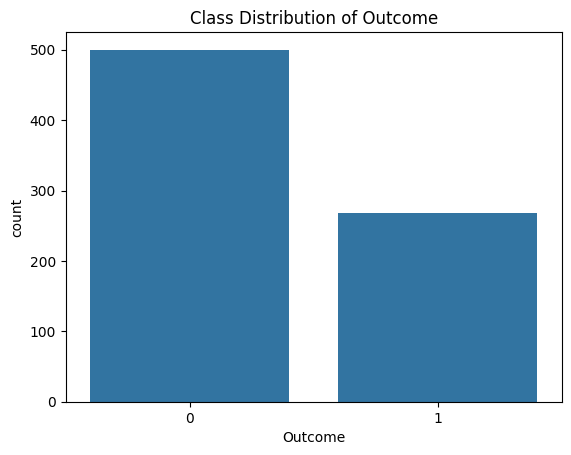

In [4]:
# Check Class Balance
sns.countplot(x='Outcome', data=data)
plt.title("Class Distribution of Outcome")
plt.show()

Step 2: Exploratory Data Analysis (EDA)

2.1 Correlation Matrix

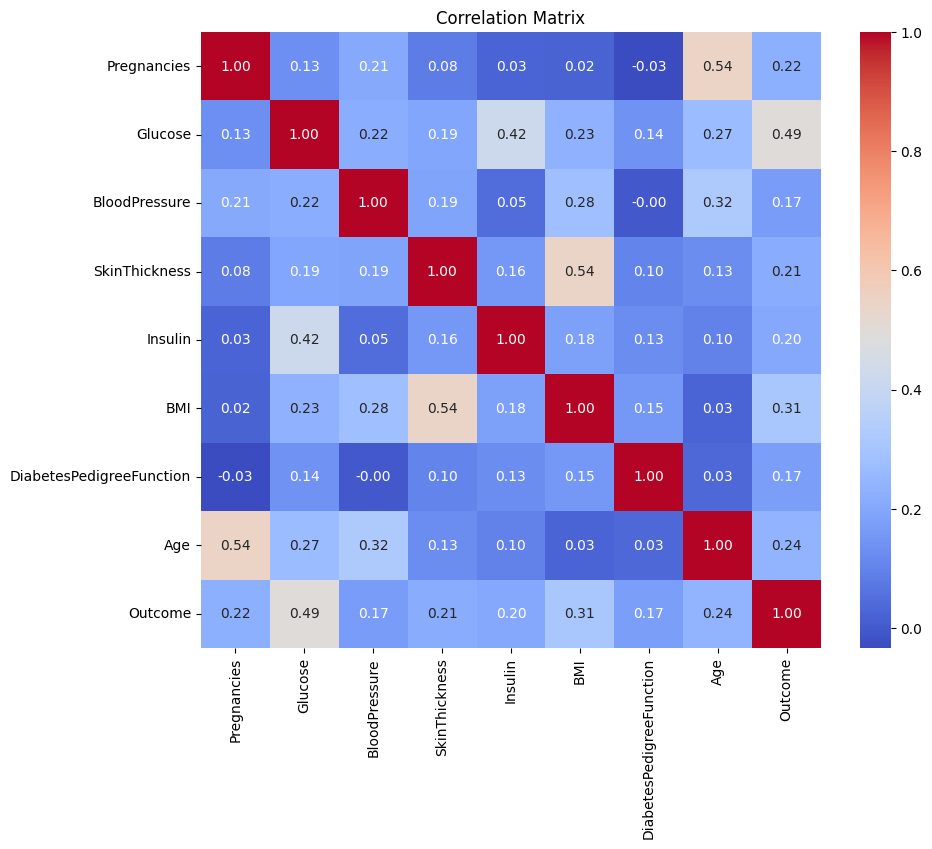

In [5]:
# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

2.2 Feature Distributions

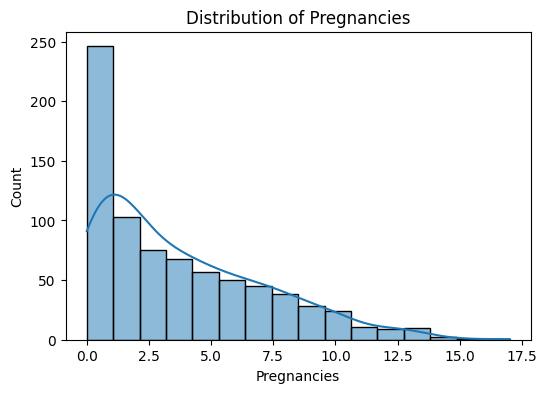

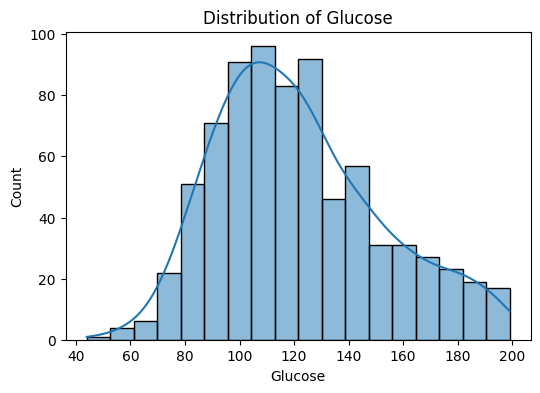

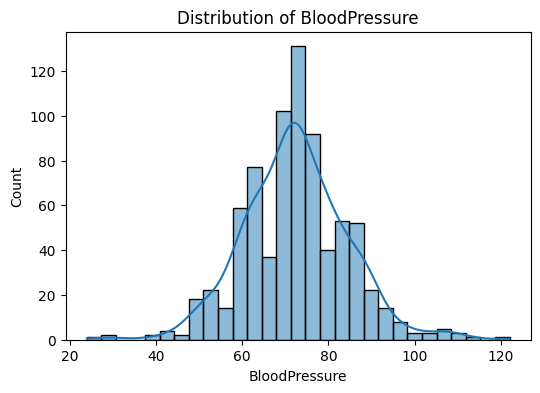

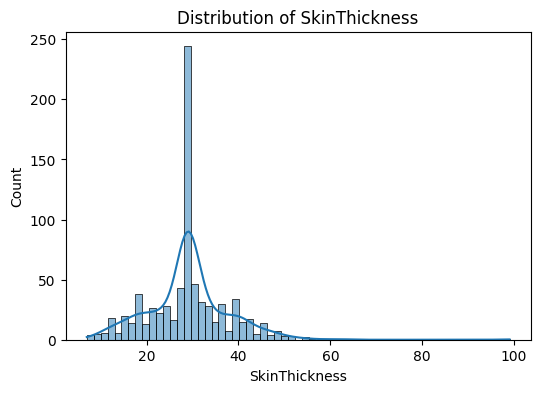

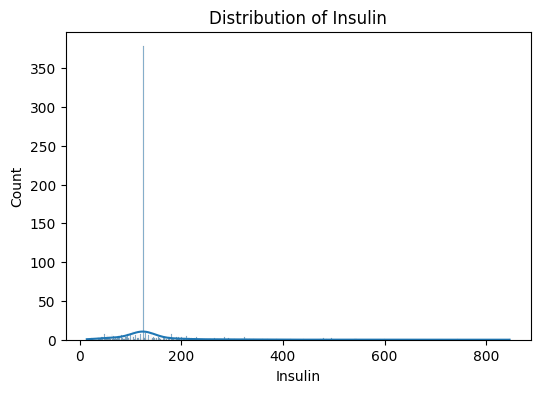

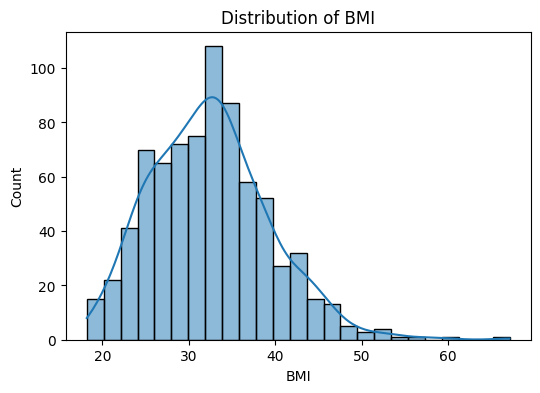

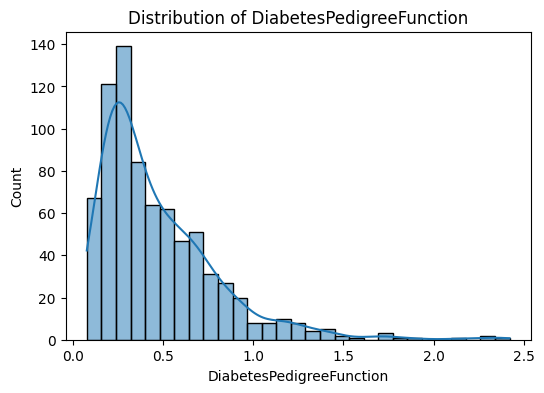

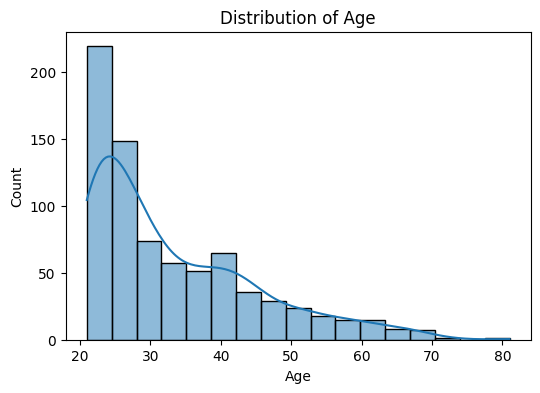

In [6]:
# Plot distributions of continuous features
for column in features.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

2.3 Visualize Class Differences

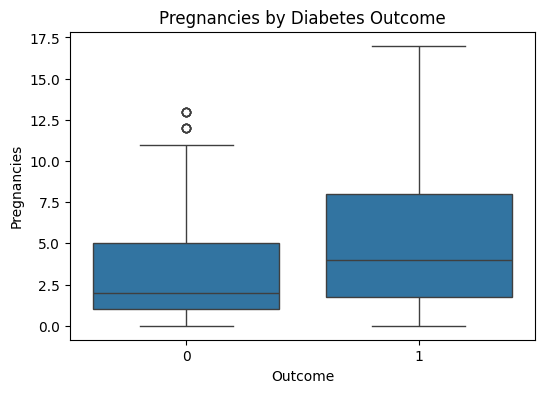

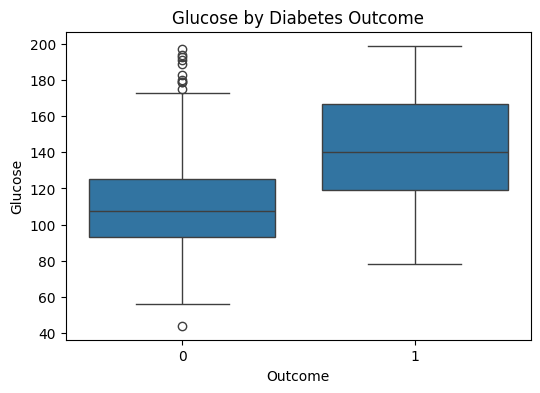

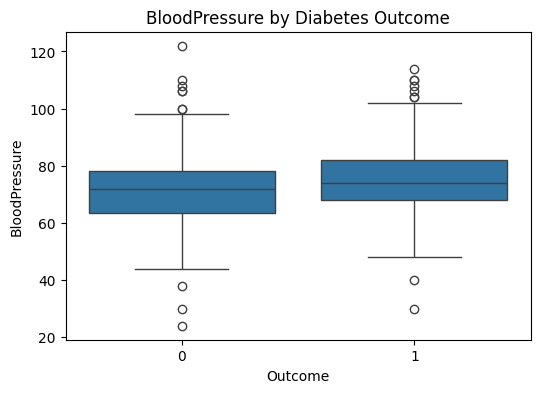

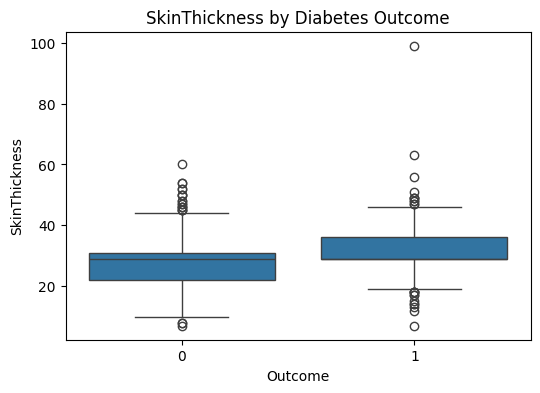

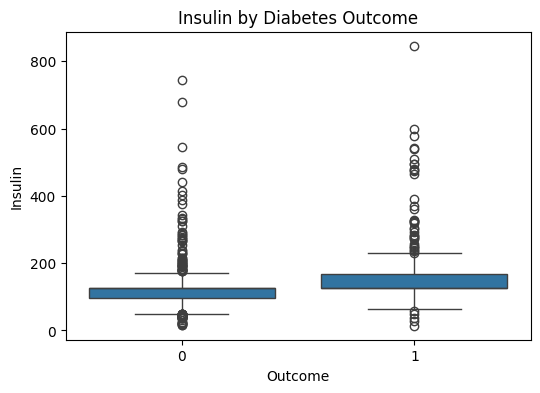

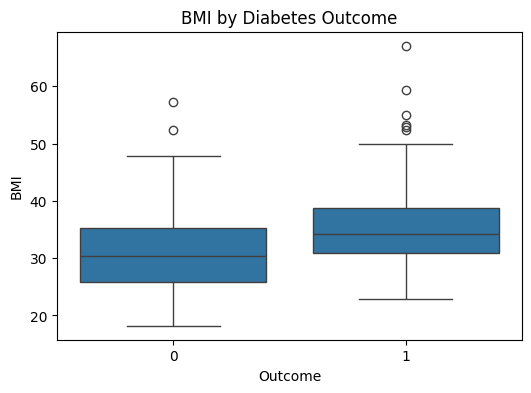

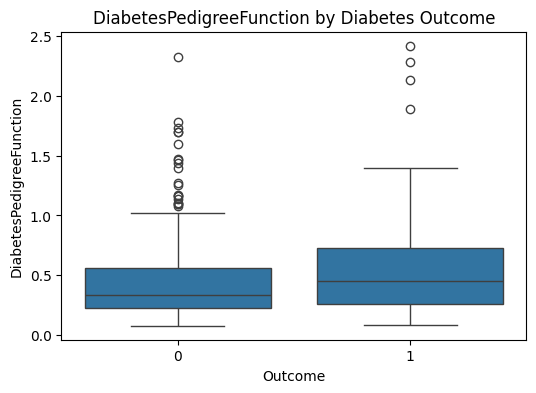

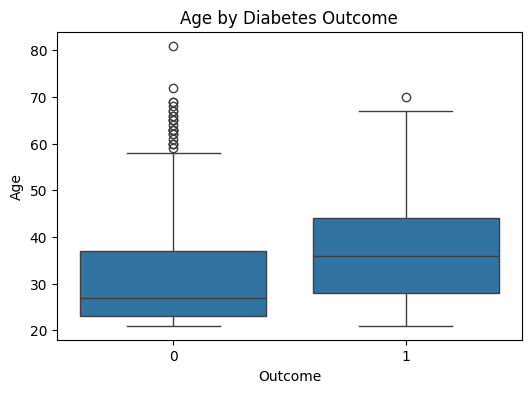

In [7]:
# Boxplot of features by Outcome class
for column in features.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Outcome', y=column, data=data)
    plt.title(f"{column} by Diabetes Outcome")
    plt.show()

Step 3: Feature Engineering

3.1 Feature Importance (Random Forest)

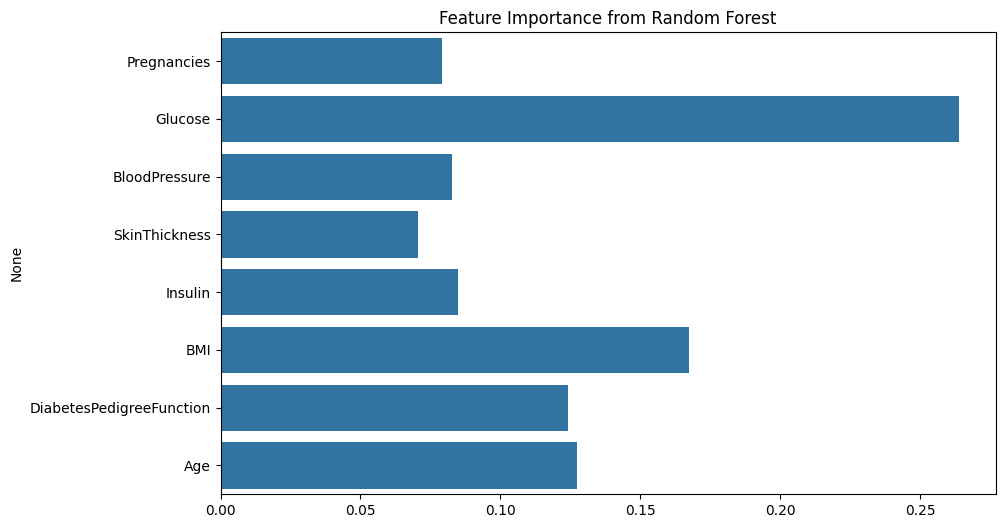

In [8]:
X = data.drop('Outcome', axis=1)  # Select all columns except 'Outcome' for features
y = data['Outcome']            # Select 'Outcome' column as the target

# Fit a Random Forest model to assess feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Plot feature importances
importances = rf.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance from Random Forest")
plt.show()

Step 4: Model Building

4.1 Train-Test Split

In [9]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4.2 Algorithm 1 - Random Forest

In [10]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

4.3 Algorithm 2 - Support Vector

In [11]:
# Support Vector Machine
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

4.4 Algorithm 3 - XGBoost

In [12]:
# XGBoost Classifier
xgb_model = xgb.XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

Step 5: Model Evaluation


Calculate Performance Metrics, Confusion Matrix & ROC Curves

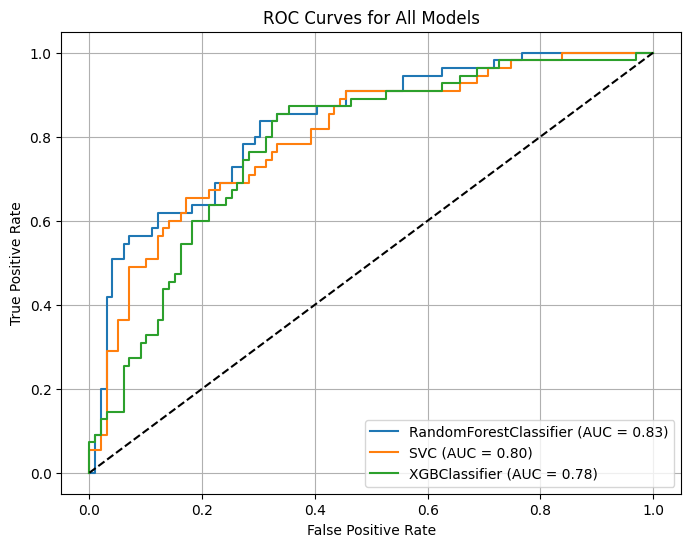

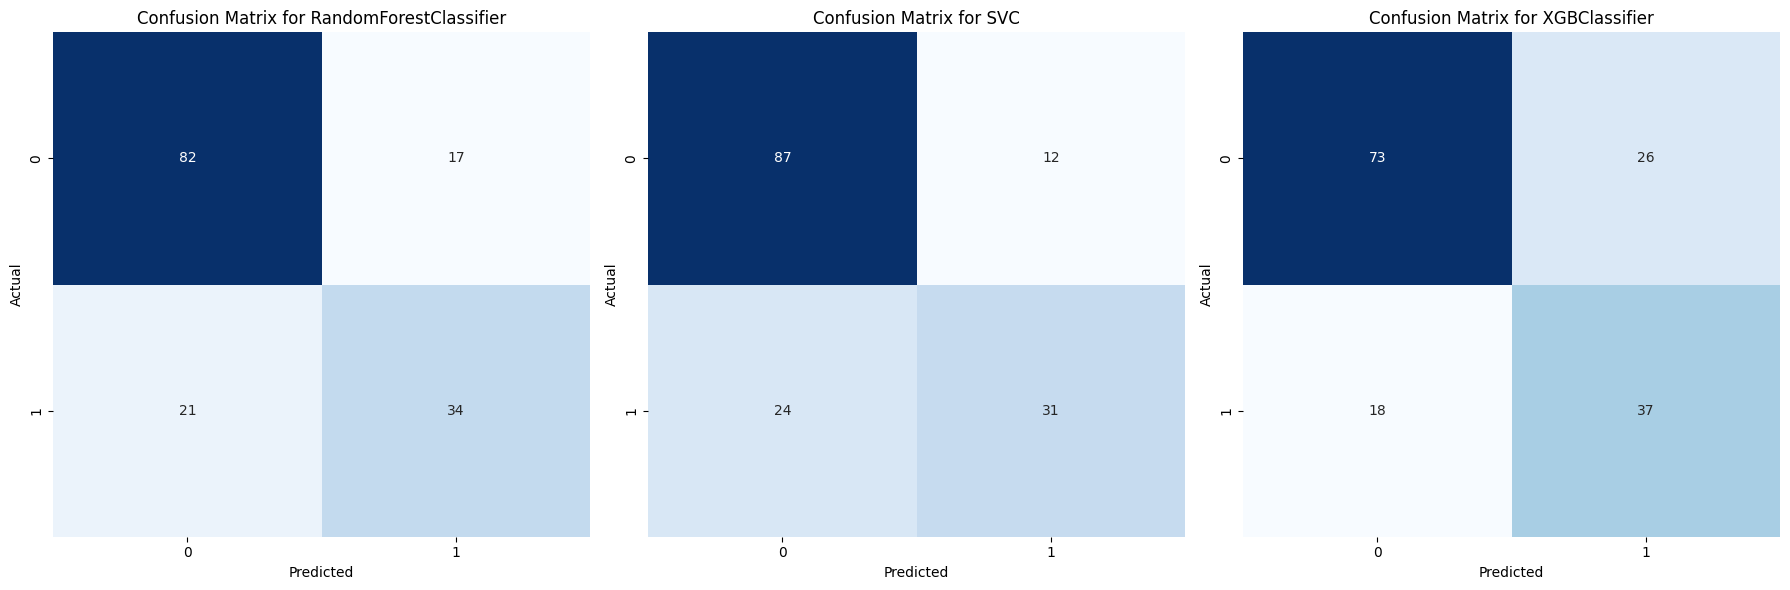

Performance Metrics for RandomForestClassifier:
Accuracy: 0.75
Precision: 0.67
Recall: 0.62
F1 Score: 0.64
AUC-ROC: 0.83

Performance Metrics for SVC:
Accuracy: 0.77
Precision: 0.72
Recall: 0.56
F1 Score: 0.63
AUC-ROC: 0.80

Performance Metrics for XGBClassifier:
Accuracy: 0.71
Precision: 0.59
Recall: 0.67
F1 Score: 0.63
AUC-ROC: 0.78



In [13]:
# Function to plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test, ax, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', ax=ax, cbar=False)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_title(f"Confusion Matrix for {model_name}")

# Function to evaluate and return performance metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])  # AUC for binary classification

    return accuracy, precision, recall, f1, auc_score

# Function to plot ROC curve
def plot_roc_curve(models, X_test, y_test):
    plt.figure(figsize=(8, 6))
    for model in models:
        y_scores = model.predict_proba(X_test)[:, 1]  # Scores for the positive class
        fpr, tpr, _ = roc_curve(y_test, y_scores)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for All Models')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Evaluate models and store metrics
models = [rf_model, svm_model, xgb_model]
metrics = {}

for model in models:
    metrics[model.__class__.__name__] = evaluate_model(model, X_test, y_test)

# Plot ROC curves for all models in one figure
plot_roc_curve(models, X_test, y_test)

# Create subplots for confusion matrices
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot confusion matrices for each model
for ax, model in zip(axs, models):
    plot_confusion_matrix(model, X_test, y_test, ax, model.__class__.__name__)

plt.tight_layout()
plt.show()

# Print performance metrics
for model_name, values in metrics.items():
    print(f"Performance Metrics for {model_name}:")
    print(f"Accuracy: {values[0]:.2f}")
    print(f"Precision: {values[1]:.2f}")
    print(f"Recall: {values[2]:.2f}")
    print(f"F1 Score: {values[3]:.2f}")
    print(f"AUC-ROC: {values[4]:.2f}")
    print()
